<a href="https://colab.research.google.com/github/dKanikao26/ML_Leanings/blob/main/exploratorydtaanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

changes on github

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

we will be working on titanic data

In [ ]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


first going with univariant analysis on numerical column

AGE COLLUMN

CONCLUSION :

1.   age column is normally distributed
2.   there are some outliers



finding basic stats

In [ ]:
test['Age']

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,NaN
414,39.0
415,38.5
416,NaN


In [ ]:
test['Age'].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


<Axes: ylabel='Frequency'>

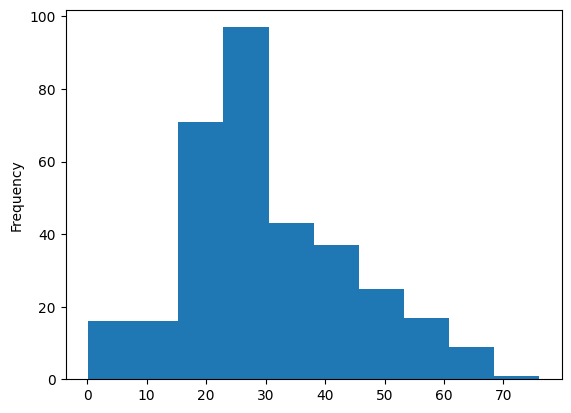

In [ ]:
test['Age'].plot(kind='hist' , bins = 10)

by doing this i cam to know that there are infants , majourity is young people and  very few are less than 80

<Axes: ylabel='Density'>

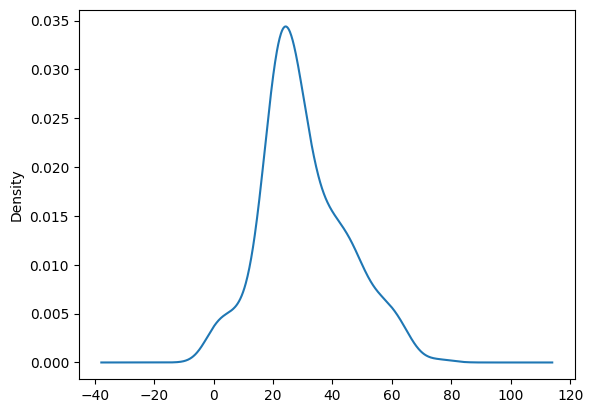

In [ ]:
test['Age'].plot(kind='kde' )#here data is normally distributed

to get measure of skewness

In [ ]:
train['Age'].skew()

np.float64(0.38910778230082704)

we visualize the outliers and then then check weatehr they are valid outliers or not

<Axes: >

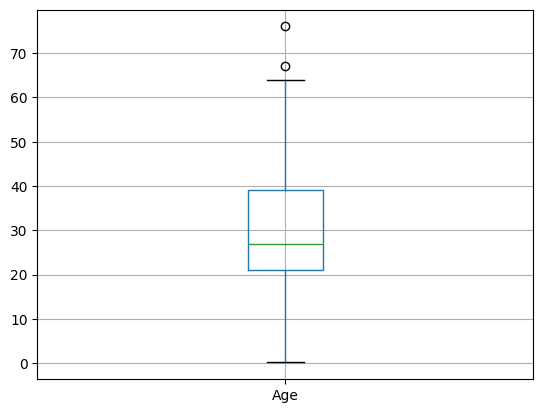

In [ ]:
test.boxplot(column='Age')

now we check wetaher these outliers are valid data point sor error like age == 400

In [ ]:
test[test['Age'] > 60]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
13,905,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C
193,1085,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,NaN,Q
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,D37,C


In [ ]:
train['Age'].isnull().sum()

np.int64(177)

doing for fare column

comclusions:

1.    posotively skewed data
2.   some data entry has same fare



In [ ]:
train['Fare']

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [ ]:
train['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='Frequency'>

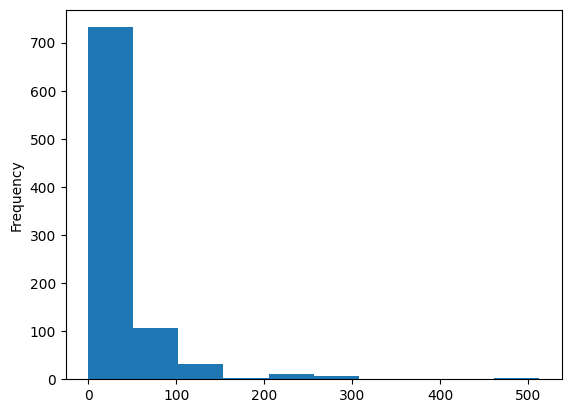

In [ ]:
train['Fare'].plot(kind='hist' , bins = 10) #highly  positively skewwed data

<Axes: ylabel='Density'>

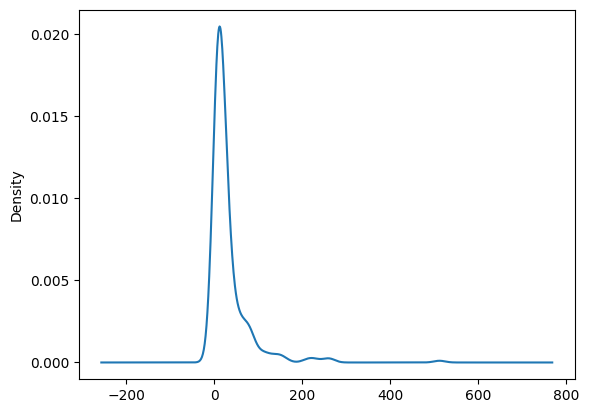

In [ ]:
train['Fare'].plot(kind='kde' )

In [ ]:
train['Fare'].skew()

np.float64(4.787316519674893)

<Axes: >

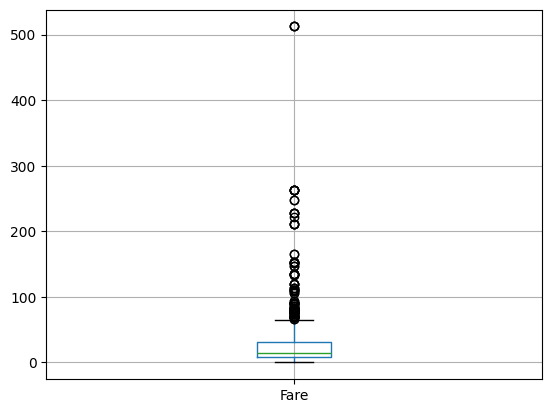

In [ ]:
train.boxplot(column='Fare')

check is outlier are valid

In [ ]:
train[train['Fare']>300]     # we came to know all of them have same fare price maybe they belong to one family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
train[train['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


univarient for catagorical columns - 	Survived	Pclass	Sex	SibSp	Parch
and write conclusion for all

CONCLUSION:


1.   first thing is sibsp and Parch	 could be combined
2.   also there should be  column of alone or not



In [ ]:
train['Survived']

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
data = train['Survived'].value_counts()
data

,count
Survived,
0,549
1,342


A count plot is a type of bar plot that shows the counts of observations in each categorical bin using bars. It’s particularly useful for visualizing the distribution of a categorical variable.

<Axes: xlabel='Survived'>

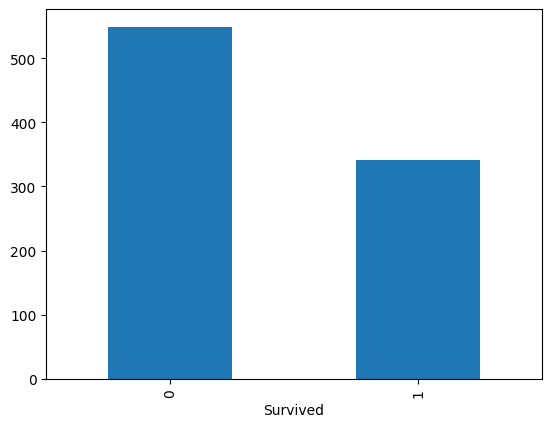

In [ ]:
data.plot(kind = 'bar')

for getting percentage we can go with pie chart also

<Axes: ylabel='count'>

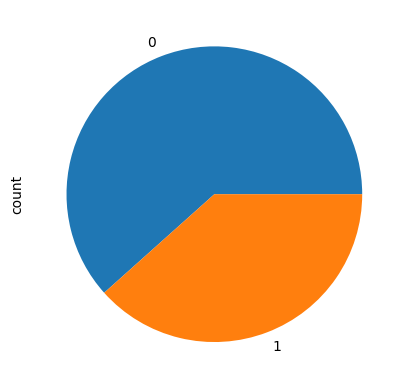

In [ ]:
data.plot(kind='pie')

In [ ]:
train['Survived'].isnull().sum()

np.int64(0)

In [ ]:
train['SibSp']

,SibSp
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,1
889,0


In [ ]:
train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='SibSp'>

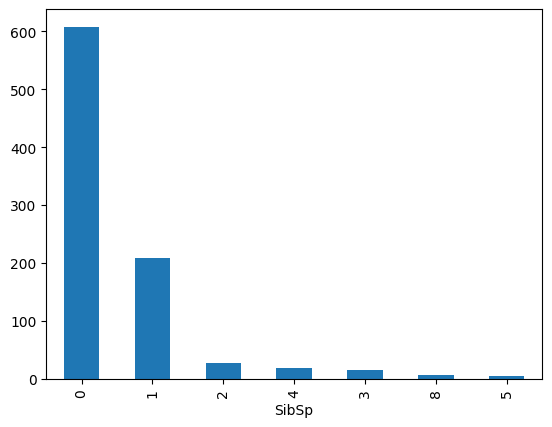

In [ ]:
train['SibSp'].value_counts().plot(kind='bar')

In [ ]:
train['Parch']

,Parch
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,2
889,0


In [ ]:
train['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


bivariant analysis on numerical v/s numerical

<Axes: xlabel='Age', ylabel='Fare'>

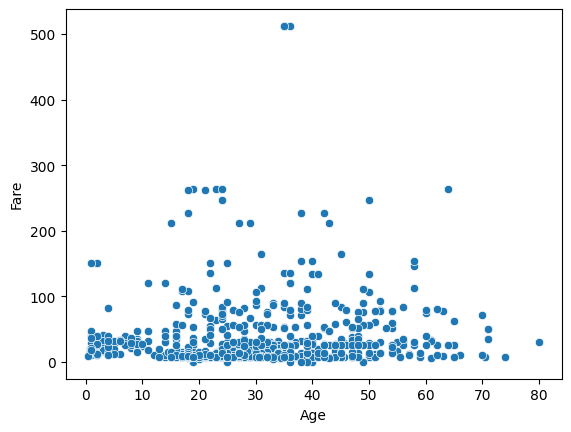

In [ ]:
sns.scatterplot(x='Age' , y='Fare' , data=train)

<Axes: xlabel='Age', ylabel='Fare'>

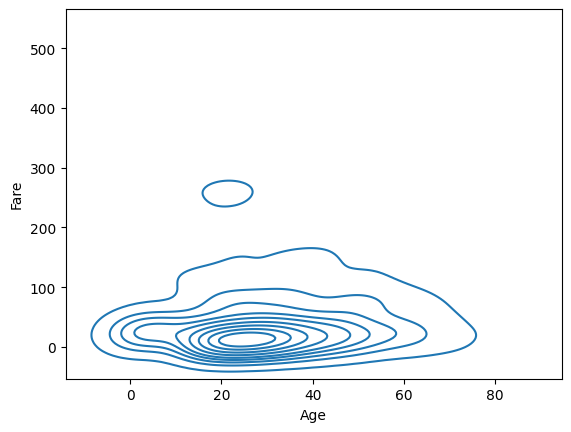

In [ ]:
sns.kdeplot(x='Age' , y='Fare' , data=train) # it shows combined distribution of fare  and age in z axis

<Axes: xlabel='Age', ylabel='Fare'>

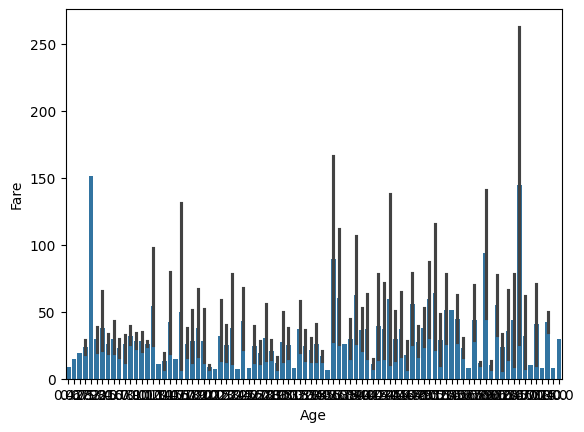

In [ ]:
sns.barplot(x='Age' , y='Fare' , data=train)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


nest is numerical v\s catagorical analysis

*   check between age and pclass , age v/s survided
*   List item



<Axes: xlabel='Pclass', ylabel='Age'>

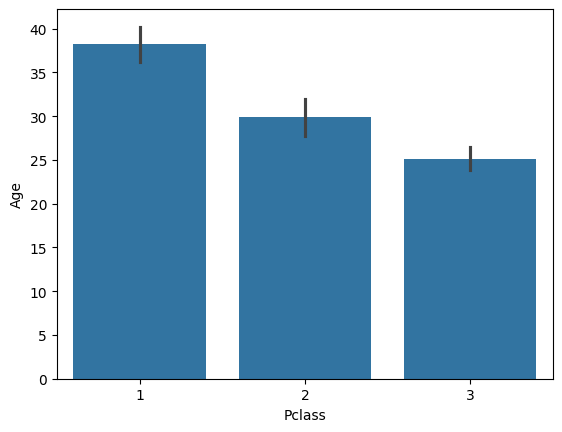

In [ ]:
sns.barplot(x='Pclass' , y='Age' , data=train)

not any useful insights

<Axes: xlabel='Survived', ylabel='Age'>

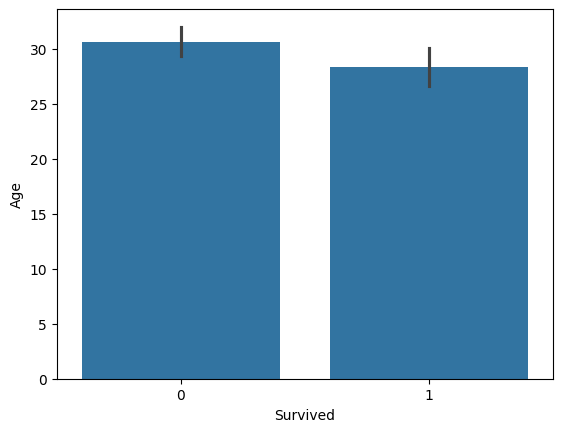

In [ ]:
sns.barplot(x='Survived' , y='Age' , data=train)

with pclass and fare pcalss1 people pay more and amogst them female pay more

<Axes: xlabel='Pclass', ylabel='Fare'>

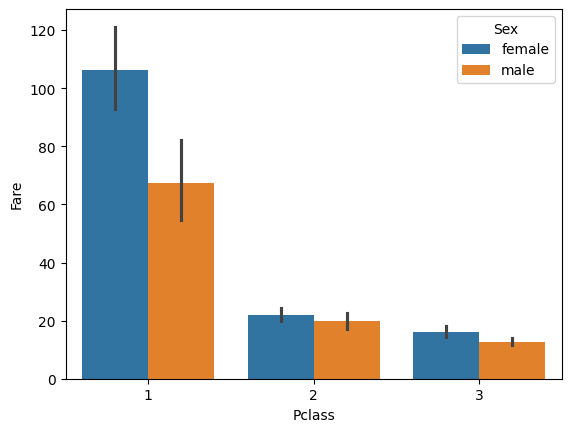

In [ ]:
sns.barplot(x='Pclass' , y='Fare' , data=train , hue = 'Sex')

<Axes: xlabel='Pclass', ylabel='Age'>

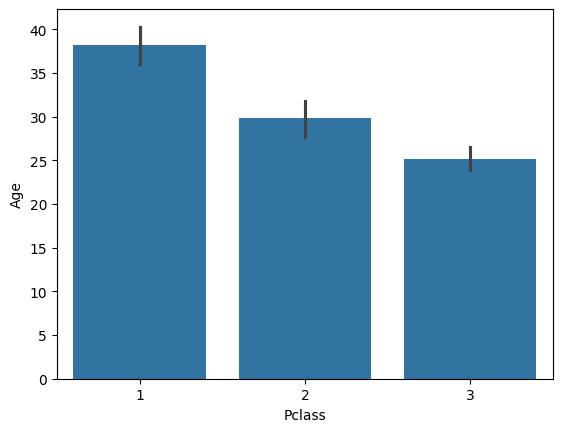

In [ ]:
sns.barplot(x = 'Pclass' , y = 'Age' , data = train )

boxplot for numerical vs catagorical

<Axes: xlabel='Pclass', ylabel='Age'>

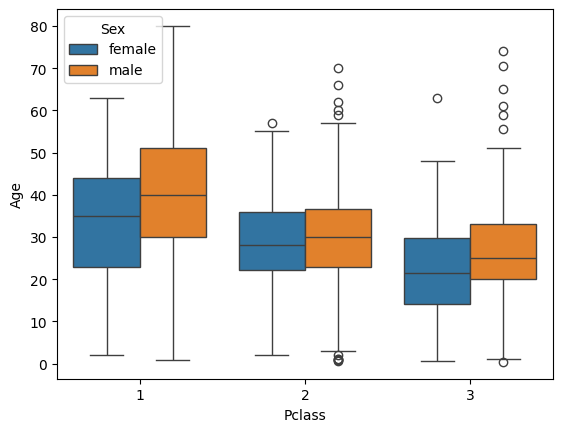

In [ ]:
sns.boxplot(x='Pclass' , y='Age' , data=train , hue = train['Sex'])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


CATAGORICAL V/S CATAGORICAL

**HEATMAP**

we have Survived	Pclass	Sex	SibSp	Parch	Embarked

In [ ]:
# we use crosstab  to find count of each catagory

<Axes: xlabel='Survived', ylabel='Pclass'>

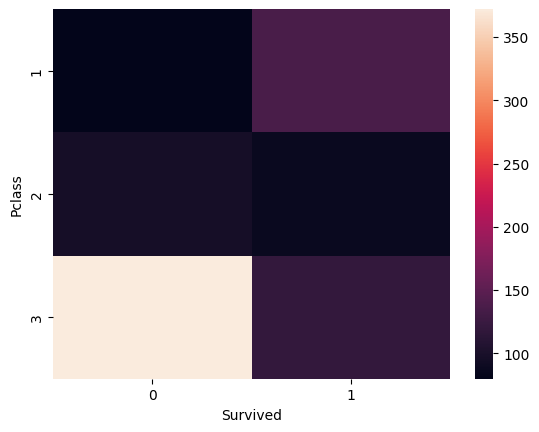

In [ ]:
y = pd.crosstab(train['Pclass'] , train['Survived'])
sns.heatmap(y)

In [ ]:
y = pd.crosstab(train['Pclass'] , train['Survived'])
train.groupby('Pclass')['Survived'].mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train)
prof.to_file(output_file='output.html')

AttributeError: module 'numba' has no attribute 'generated_jit'

In [ ]:
pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 16.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]